## Introduction

This project will investigate if there is a correlation between the economic output of a country and the life expectancy of its citizens.

The goals are to prepare data, followed by analysis with plots, and seek to explain the findings from the study.

Here are a few questions that this project will seek to answer:

+ Has life expectancy increased over time in the six nations?
+ Has GDP increased over time in the six nations?
+ Is there a correlation between GDP and life expectancy of a country?
+ What is the average life expectancy in these nations?
+ What is the distribution of that life expectancy?

**Data sources**

- GDP Source: [World Bank](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD) national accounts data, and OECD National Accounts data files.

- Life expectancy Data Source: [World Health Organization](http://apps.who.int/gho/data/node.main.688)

- Final dataset provided by [codecademy](https://www.codecademy.com).

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv("all_data.csv")
data.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


## Data Exploration

The dataset includes 96 instances (rows) with 4 columns of data each.

In [3]:
data.shape

(96, 4)

The countries included in the dataset are: 
Chile, China, Germany, Mexico, US, and Zimbabwe.

In [4]:
print(data.Country.unique())

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


The years spanned by the dataset is the range from 2000 - 2015.

In [5]:
print(data.Year.unique())

[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


The column "Life expectancy at birth (years)" is renamed to "Life_Expectancy" for the purpose of convenience.

In [6]:
data = data.rename({"Life expectancy at birth (years)":"Life_Expectancy"}, axis = "columns")
data.head()

,Country,Year,Life_Expectancy,GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


### Inspecting data distribution

The lowest life expectancy lies at around 45 years, while the highest is estimated at around 80 years. It can also be seen that the majority of life expectancies accumulate at around 70 - 80 years, whereas there seems to be another, smaller group ranging from 45 - 60 years.

<Figure size 576x432 with 0 Axes>

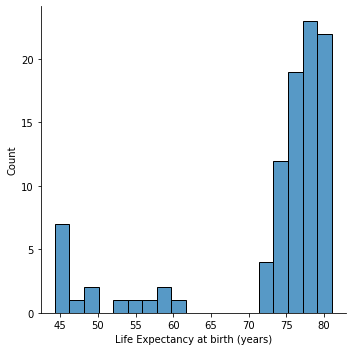

In [7]:
plt.figure(figsize=(8,6))
sns.displot(data.Life_Expectancy)
plt.xlabel("Life Expectancy at birth (years)")
plt.show()

While the life expectancy distribution is quite left-skewed (i.e. most of the data accumulates on the right hand side), the plot of the GDP is clearly right-skewed (i.e. most of the data is seen of the left).

<Figure size 576x432 with 0 Axes>

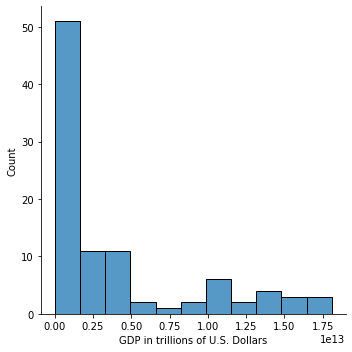

In [8]:
plt.figure(figsize=(8,6))
sns.displot(data.GDP)
plt.xlabel("GDP in trillions of U.S. Dollars")
plt.show()

### Inspecting GDP and Life Expectancy per country

#### Bar Plots

The highest average GDP is registered for the U.S., followed by China and Germany. The lowest numbers belong to Mexico, Chile and Zimbabwe.

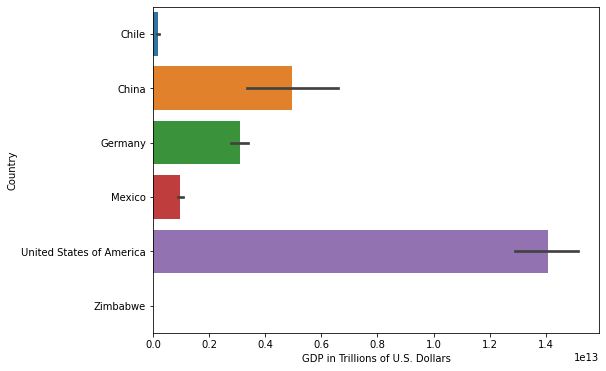

In [9]:
plt.figure(figsize=(8,6))
sns.barplot(x="GDP", y="Country", data=data)
plt.xlabel("GDP in Trillions of U.S. Dollars");

The life expectancies lie at around 70 - 80 years for almost all countries, except for Zimbabwe, where it is around 50 on average.

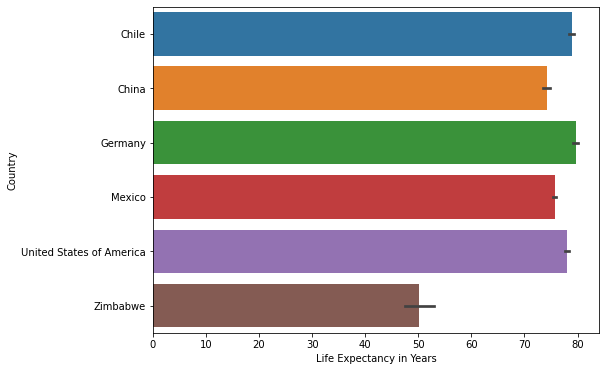

In [10]:
plt.figure(figsize=(8,6))
sns.barplot(x="Life_Expectancy", y="Country", data=data)
plt.xlabel("Life Expectancy in Years");

#### Violin Plots

Inspecting the same data as above with violin plots, we can now see shapes of the distributions better. For example, China and the U.S. have a wider GDP range than the rest of the countries. As for life expectancies, Zimbabwe has a much wider range than the other countries.

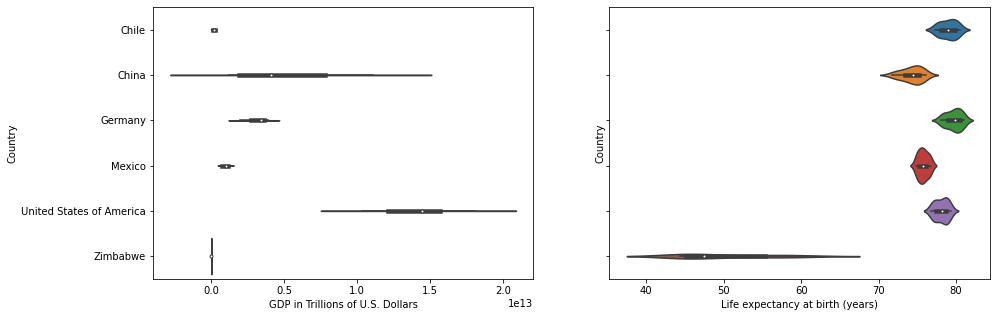

In [11]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15, 5))
axes[0] = sns.violinplot(ax=axes[0], x=data.GDP, y=data.Country)
axes[0].set_xlabel("GDP in Trillions of U.S. Dollars")
axes[1] = sns.violinplot(ax=axes[1], x=data.Life_Expectancy, y=data.Country)
axes[1].set_xlabel("Life expectancy at birth (years)");

#### Line Charts
#### GDP
This line chart shows the growth of GDP through the years by country. We can see that China significantly began to grow around the years 2006 - 2008. The U.S. also shows growth, but starts out at a higher level initially. The rest of the countries do not seem to have had significant changes over time.

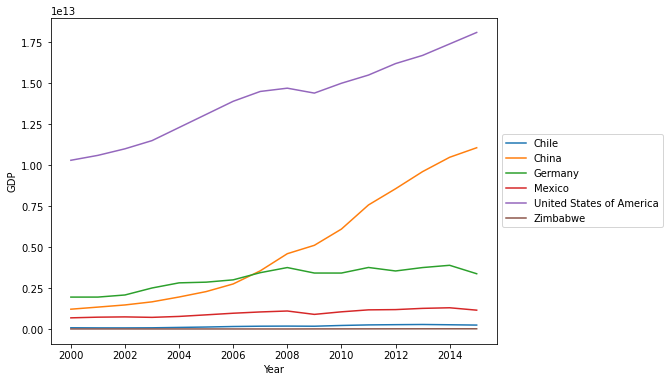

In [12]:
plt.figure(figsize=(8,6))
sns.lineplot(x=data.Year, y=data.GDP, hue=data.Country)
plt.legend(loc="center left",bbox_to_anchor=(1, 0.5))
plt.show()

#### Life Expectancy
Plotting the life expectancies the same way, we can see that Zimbabwe's life expectancies began steadily rising around 2006 - 2008.

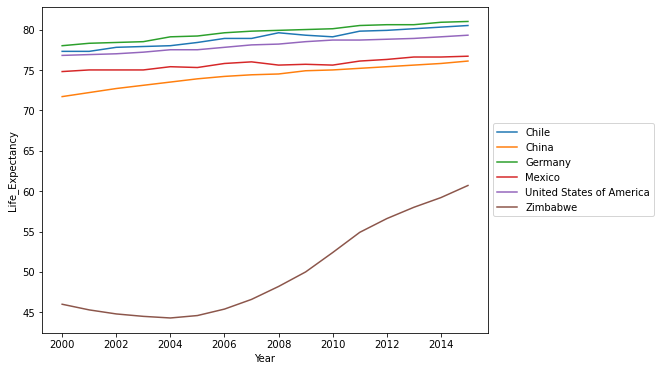

In [13]:
plt.figure(figsize=(8,6))
sns.lineplot(x=data.Year, y=data.Life_Expectancy, hue=data.Country)
plt.legend(loc="center left",bbox_to_anchor=(1, 0.5))
plt.show()

#### "Zooming" into each country

#### GDP
To see the developments of each country more clearly, we can plot them one by one. For example, in the visualizations above we could not see any GDP growth in Zimbabwe. However, it is clearly there, beginning around the year 2008. It is just much smaller when compared to the other countries, which is why it was overlooked before.

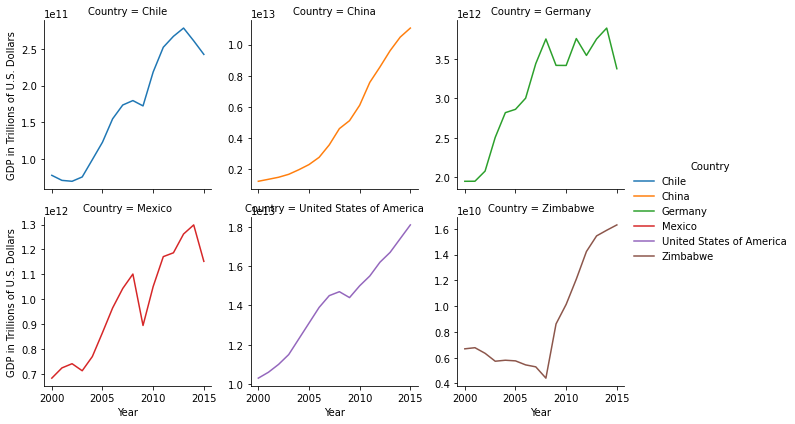

In [14]:
graphGDP = sns.FacetGrid(data, col="Country", col_wrap=3,
                      hue = "Country", sharey = False)

graphGDP = (graphGDP.map(sns.lineplot,"Year","GDP")
         .add_legend()
         .set_axis_labels("Year","GDP in Trillions of U.S. Dollars"))

graphGDP;

#### Life Expectancy

The life expectancies rose in each country, but, as with the visualization above, the scales on the left hand side need to be taken into account: while Chile rose from 77.5 to 80.5 (+3), China rose from 72 to 76 (+4) and Zimbabwe from 45 (at the lowest) to 60 (+15!).

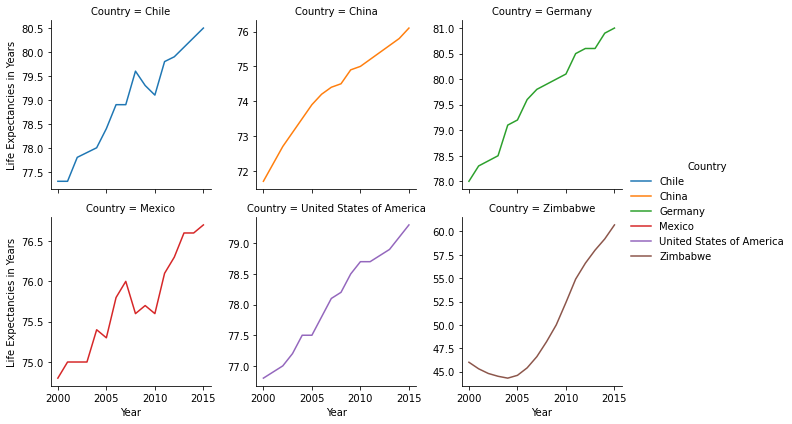

In [15]:
graphGDP = sns.FacetGrid(data, col="Country", col_wrap=3,
                      hue = "Country", sharey = False)

graphGDP = (graphGDP.map(sns.lineplot,"Year","Life_Expectancy")
         .add_legend()
         .set_axis_labels("Year","Life Expectancies in Years"))

graphGDP;

### Conclusions

This project was able to make quite a few data visualizations with the data even though there were only 96 rows and 4 columns. 

The project was also able to answer some of the questions posed in the beginning:

- Has life expectancy increased over time in the six nations?
    - Yes with Zimbabwe having the greatest increase.
- Has GDP increased over time in the six nations?
    - GDP has also increased for all countries in our list, especially for China.
- Is there a correlation between GDP and life expectancy of a country?
    - Although it's hard to say for certain, but there does seem to be a positive correlation between GDP and life expectancy for countries in this dataset.
- What is the average life expectancy in these nations?
    - Average life expectancy was between mid to high 70s for the countries except for Zimbabwe which was 50.
- What is the distribution of that life expectancy?
    - the life expectancy had a left skew, or most of the observations were on the right side.